In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('files/admissions.csv')
#df_N = pd.read_csv('patients.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null int64
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               5854 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64
dtypes: int64(5), objec

In [21]:
df['SUBJECT_ID'].nunique()

46520

In [22]:
df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'],dayfirst=True)
df['DISCHTIME'] = pd.to_datetime(df['DISCHTIME'],dayfirst=True)

# Convert timedelta type into float 'days', 86400 seconds in a day
df['LOS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.total_seconds()/86400
df[['ADMITTIME', 'DISCHTIME', 'LOS']].head()

,ADMITTIME,DISCHTIME,LOS
0,2196-04-09 12:26:00,2196-04-10 15:54:00,1.144444
1,2153-09-03 07:15:00,2153-09-08 19:10:00,5.496528
2,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056
3,2139-06-06 16:14:00,2139-06-09 12:48:00,2.856944
4,2160-11-02 02:06:00,2160-11-05 14:55:00,3.534028


In [23]:
#df_N = df_N[['SUBJECT_ID', 'DOB', 'GENDER']]
#df = df.merge(df_N, how='outer', on='SUBJECT_ID')
#df_age_min = df[['SUBJECT_ID', 'ADMITTIME']].groupby('SUBJECT_ID').min().reset_index()
#df_age_min.columns = ['SUBJECT_ID', 'MIN_ADMIT']
#df = pd.merge(df, df_age_min, how='outer', on='SUBJECT_ID')
#df['MIN_ADMIT'] = pd.to_datetime(df['MIN_ADMIT']).dt.date
#df['MIN_ADMIT'] = pd.to_datetime(df['MIN_ADMIT'])
#df['DOB'] = pd.to_datetime(df['DOB'])
#df['age'] = df.apply(lambda e: (e['MIN_ADMIT'] - e['DOB']).days//365, axis=1)
#df['age'] = np.where(df['age'] >89, 90, df['age'])
#df['HADM_ID'][df['age']<15].nunique()

In [24]:
#df_N = df_N[['SUBJECT_ID', 'DOB', 'GENDER']]
#df = df.merge(df_N, how='outer', on='SUBJECT_ID')
#df_N['GENDER'].replace({'M': 0, 'F':1}, inplace=True)
#df['SUBJECT_ID'][df['GENDER']=='F'].nunique()

In [25]:
# Drop LOS < 0 
df = df[df['LOS'] > 0]
df= df[df['DEATHTIME'].isnull()]
df.describe()
#df['LOS'][df['LOS'] > 0].describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
count,53104.000000,53104.000000,53104.000000,53104.0,53104.000000,53104.000000
mean,29464.483655,33716.979305,149998.949966,0.0,0.970643,10.138174
std,17023.973980,28096.369912,28875.506563,0.0,0.168808,12.284461
min,1.000000,2.000000,100001.000000,0.0,0.000000,0.014583
25%,14722.750000,11973.000000,124992.500000,0.0,1.000000,3.866667
50%,29424.500000,24088.500000,150038.000000,0.0,1.000000,6.565972
75%,44178.250000,53714.000000,174943.000000,0.0,1.000000,11.711632
max,58976.000000,99999.000000,199999.000000,0.0,1.000000,294.660417


In [26]:
df['LOS'].describe()

count    53104.000000
mean        10.138174
std         12.284461
min          0.014583
25%          3.866667
50%          6.565972
75%         11.711632
max        294.660417
Name: LOS, dtype: float64

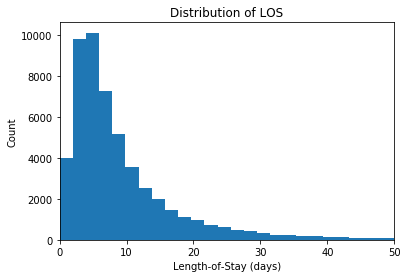

In [27]:
plt.hist(df['LOS'], bins=150)
plt.xlim(0, 50)
plt.title('Distribution of LOS')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
#plt.tick_params(top=False, right=False) 
plt.show();

In [28]:
df.drop(columns=['DISCHTIME', 'ROW_ID', 
                'EDREGTIME', 'EDOUTTIME', 'HOSPITAL_EXPIRE_FLAG',
                'HAS_CHARTEVENTS_DATA'], inplace=True)

C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


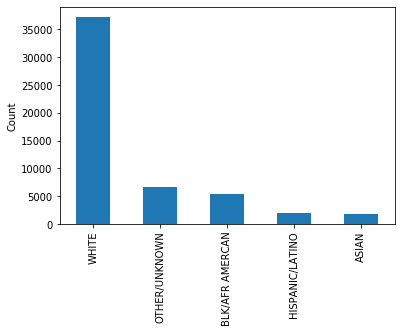

In [29]:
# Compress the number of ethnicity categories
df['ETHNICITY'].replace(regex=r'^ASIAN\D*', value='ASIAN', inplace=True)
df['ETHNICITY'].replace(regex=r'^WHITE\D*', value='WHITE', inplace=True)
df['ETHNICITY'].replace(regex=r'^HISPANIC\D*', value='HISPANIC/LATINO', inplace=True)
df['ETHNICITY'].replace(regex=r'^BLACK\D*', value='BLK/AFR AMERCAN', inplace=True)
df['ETHNICITY'].replace(['UNABLE TO OBTAIN', 'OTHER', 'PATIENT DECLINED TO ANSWER', 
                         'UNKNOWN/NOT SPECIFIED'], value='OTHER/UNKNOWN', inplace=True)
df['ETHNICITY'].loc[~df['ETHNICITY'].isin(df['ETHNICITY'].value_counts().nlargest(5).index.tolist())] = 'OTHER/UNKNOWN'
plt.ylabel('Count')
df['ETHNICITY'].value_counts().plot(kind="bar")

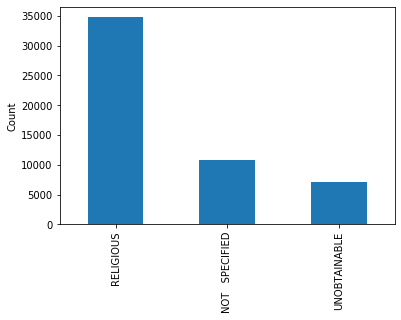

In [31]:
#df['RELIGION'].replace('UNOBTAINABLE', 'UNOBTAINABLE/NOT SPECIFIED', inplace=True)
df['RELIGION'].replace('CATHOLIC', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('PROTESTANT QUAKER', 'RELIGIOUS', inplace=True)
#df['RELIGION'].replace('NOT SPECIFIED', 'UNOBTAINABLE/NOT SPECIFIED', inplace=True)
df['RELIGION'].replace('JEHOVAH\'S WITNESS', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('GREEK ORTHODOX', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('EPISCOPALIAN', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('CHRISTIAN SCIENTIST', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('UNITARIAN-UNIVERSALIST', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('METHODIST', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('HEBREW', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('BAPTIST', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('7TH DAY ADVENTIST', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('ROMANIAN EAST. ORTH', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('JEWISH', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('BUDDHIST', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('OTHER', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('HINDU', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('MUSLIM', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('LUTHERAN', 'RELIGIOUS', inplace=True)
df['RELIGION'].replace('NOT SPECIFIED', 'NOT SPECIFIED', inplace=True)

plt.ylabel('Count')
df['RELIGION'].value_counts().plot(kind="bar")

In [90]:
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)')

In [91]:
df.to_csv('data_adm.csv',index=False)

In [92]:
df[df['ETHNICITY']=='OTHER/UNKNOWN'].mean()

SUBJECT_ID     29423.326110
HADM_ID       150307.550790
DEATHTIME               NaN
LOS               10.756127
dtype: float64

In [93]:
df['RELIGION'].unique()

array(['UNOBTAINABLE', 'Religious', 'NOT SPECIFIED', nan], dtype=object)

In [94]:
df[df['INSURANCE']=='Medicare'].mean()

SUBJECT_ID     36755.030648
HADM_ID       149983.464004
DEATHTIME               NaN
LOS                9.946889
dtype: float64

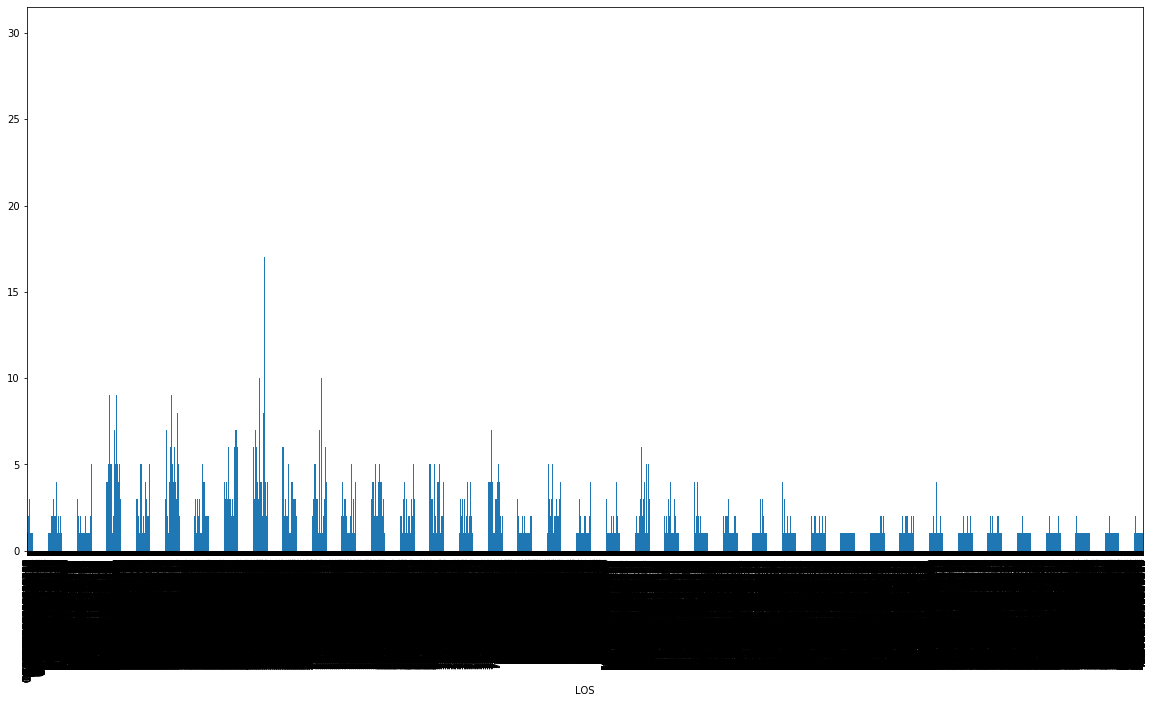

In [103]:
#df = df[df['LOS'] < 50]
#plt.rcParams["figure.figsize"] = (20,10)
df.groupby(['LOS']).size().plot.bar()

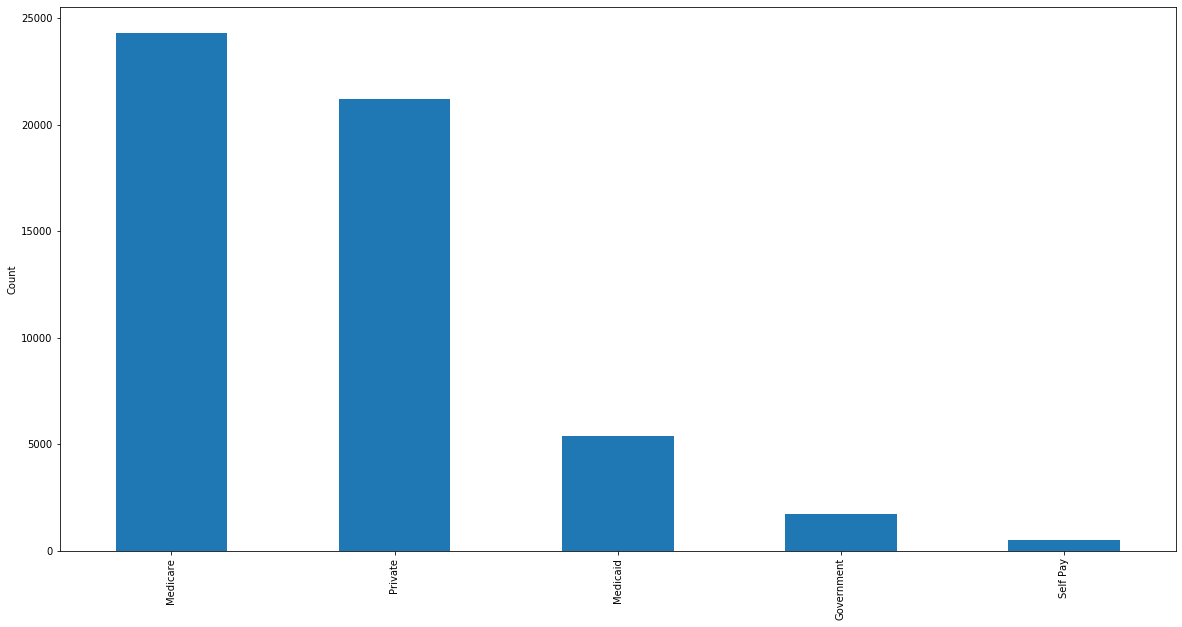

In [119]:
plt.ylabel('Count')
df['INSURANCE'].value_counts().plot(kind="bar")

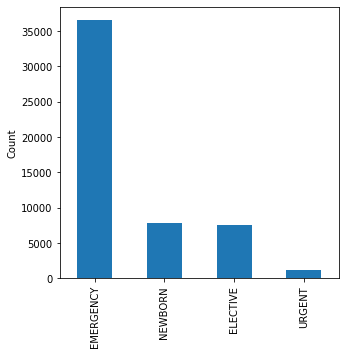

In [121]:

plt.ylabel('Count')
df['ADMISSION_TYPE'].value_counts().plot(kind="bar")